In [162]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [163]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [164]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [165]:
# Import general useful packages
import numpy as np
import pandas as pd
import re

# Counter elements 
from collections import Counter

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 

# Import matplotlib for visualisations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scikitplot as skplt

# Import all machine learning algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Import other useful subpackage
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [166]:
# Required if Uploading data directly into google colab
# from google.colab import files
# df = files.upload()

In [167]:
# Calling the Generic Tweets dataset
# import io
# df2 = pd.read_csv(io.BytesIO(df['generic_tweets.txt']))
# df2.head(n=5)

### Data Import & Cleaning - Generic Tweets

In [168]:
# Importing Generic Tweets to test models.
df2 = pd.read_csv('generic_tweets.txt')
df2.head(n=5)

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [169]:
# Data cleaning and pre-process dataset
nltk.download('stopwords')

# TEXT CLEANING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" 
# A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.
stop_words = stopwords.words("english")
# To reduce words to their root form
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
# Applying the data cleaning from above
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

df2.text = df2.text.apply(lambda x: preprocess(x))

### Exporatory Analysis - Generic Tweets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
class    200000 non-null int64
id       200000 non-null int64
date     200000 non-null object
query    200000 non-null object
user     200000 non-null object
text     200000 non-null object
dtypes: int64(2), object(4)
memory usage: 9.2+ MB
None


Text(0.5, 1.0, 'Dataset labels distribuition')

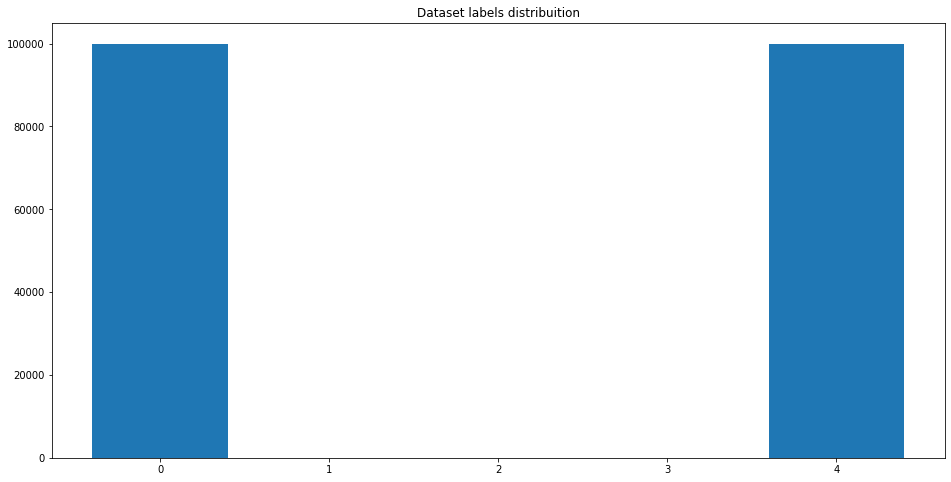

In [171]:
# check the data frame info
print(df2.info())
df2.rename(columns={"class": "sentiment"}, inplace=True)

# Get uniques values of sentiment column
df2['sentiment'].unique()

# Find count of individual sentiment and create a bar plot for better visualization
sen_cnt = Counter(df2.sentiment)

plt.figure(figsize=(16,8))
plt.bar(sen_cnt.keys(), sen_cnt.values())
plt.title("Dataset labels distribuition")


There is a perfect balance in target variable class in the dataset. This is very suitable for any ML model, as overfitting by the dominant class is avoided, irrespective of the ML model being implemented

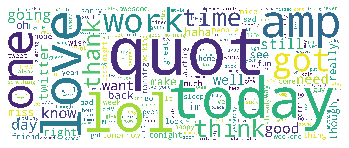

In [172]:
# all tweets 
all_words = " ".join(df2.text)

# Wordcloud of tweets
wordcloud = WordCloud(height=4000, width=10000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Model Preparation (Bag of Words and TFIDF) - Generic Tweets

For both TFIDF and Bag of Words, max_features=1000 will be used for the interest of computation speed. Otherwise, the models could take days to run if not run on big data platforms with shared cluster space. 

In [174]:
# tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, 
# and tokenization is the process of splitting a string of text into tokens
tokenized_tweet = df2['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [awww, bummer, shoulda, got, david, carr, thir...
1    [upset, update, facebook, texting, might, cry,...
2    [dived, many, times, ball, managed, save, 50, ...
3              [whole, body, feels, itchy, like, fire]
4                                 [behaving, mad, see]
Name: text, dtype: object

In [175]:
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [awww, bummer, shoulda, got, david, carr, thir...
1    [upset, updat, facebook, text, might, cri, res...
2    [dive, mani, time, ball, manag, save, 50, rest...
3               [whole, bodi, feel, itchi, like, fire]
4                                    [behav, mad, see]
Name: text, dtype: object

In [176]:
# let’s stitch these tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df2['text'] = tokenized_tweet
print(df2)

        sentiment          id                          date     query  \
0               0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1               0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2               0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3               0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4               0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
5               0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
6               0  1467811592  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY   
7               0  1467811594  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY   
8               0  1467811795  Mon Apr 06 22:20:05 PDT 2009  NO_QUERY   
9               0  1467812025  Mon Apr 06 22:20:09 PDT 2009  NO_QUERY   
10              0  1467812416  Mon Apr 06 22:20:16 PDT 2009  NO_QUERY   
11              0  1467812579  Mon Apr 06 22:20:17 PDT 2009  NO_QUERY   
12              0  1467812723  Mon Apr 06 22:20:19 

In [177]:
# BAG OF WORDS: Counting number of words per entry/document
# Bag-of-Words features can be easily created using sklearn’s CountVectorizer function. 
# We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df2['text'])
print(bow)

  (0, 225)	1
  (0, 224)	1
  (0, 373)	1
  (0, 74)	1
  (1, 105)	1
  (1, 877)	1
  (1, 735)	1
  (1, 708)	1
  (1, 208)	1
  (1, 860)	1
  (1, 296)	1
  (1, 915)	1
  (1, 917)	1
  (2, 707)	1
  (2, 12)	1
  (2, 730)	1
  (2, 539)	1
  (2, 79)	1
  (2, 874)	1
  (2, 540)	1
  (3, 507)	1
  (3, 313)	1
  (3, 112)	1
  (4, 535)	1
  (6, 434)	1
  :	:
  (199992, 387)	1
  (199992, 594)	1
  (199992, 803)	1
  (199992, 552)	1
  (199992, 517)	1
  (199993, 943)	1
  (199993, 970)	1
  (199993, 612)	1
  (199994, 477)	1
  (199994, 612)	1
  (199994, 373)	1
  (199995, 513)	1
  (199995, 387)	1
  (199995, 498)	1
  (199997, 422)	1
  (199997, 900)	1
  (199997, 874)	1
  (199998, 501)	1
  (199998, 323)	1
  (199999, 121)	1
  (199999, 347)	1
  (199999, 822)	1
  (199999, 662)	1
  (199999, 61)	1
  (199999, 526)	1


In [178]:
# TF-IDF: It works by penalizing the common words by assigning them lower weights while giving 
# importance to words which are rare in the entire corpus but appear in good numbers
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df2['text'])

In [179]:
print(tfidf)

  (0, 74)	0.5914496287582646
  (0, 373)	0.37475504299386675
  (0, 224)	0.635836307151928
  (0, 225)	0.3247432599759005
  (1, 917)	0.36795372005829907
  (1, 915)	0.31387866812306936
  (1, 296)	0.34352598128170037
  (1, 860)	0.3429473275559573
  (1, 208)	0.3220421724688195
  (1, 708)	0.3920093534271115
  (1, 735)	0.2626550551630971
  (1, 877)	0.20855732210382913
  (1, 105)	0.40075047557125837
  (2, 540)	0.34331986038588624
  (2, 874)	0.2330009288788982
  (2, 79)	0.43036810124905645
  (2, 539)	0.4115062679365704
  (2, 730)	0.39080546940759253
  (2, 12)	0.4337805386200754
  (2, 707)	0.3638591195476241
  (3, 112)	0.7753958305415023
  (3, 313)	0.4715532953157644
  (3, 507)	0.4199985662543353
  (4, 535)	1.0
  (6, 590)	0.5590683007766692
  :	:
  (199992, 552)	0.45383016217641314
  (199992, 803)	0.384742436274447
  (199992, 594)	0.3792503913801654
  (199992, 387)	0.37604527314221436
  (199992, 130)	0.5024969127917983
  (199993, 612)	0.6580489612219965
  (199993, 970)	0.4516419056009819
  (19999

In [180]:
# Spliting Data form above reduction dataset for bag of words
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df2['sentiment'], test_size = 0.3, random_state = 3)

### Model Implementation & Results (Bag of Words and TFIDF) - Generic Tweets

In [181]:
# Applying various Classification algorithms without doing variable reductions using bag of words
accuracy_scores = np.zeros(7)

# Support Vector Classifier
svm = SVC().fit(X_train, y_train)
prediction1 = svm.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction1)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
logis = LogisticRegression().fit(X_train, y_train)
prediction2 = logis.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction2)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
knn = KNeighborsClassifier().fit(X_train, y_train)
prediction3 = knn.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction3)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Gaussian Naive Bayes
#clf = GaussianNB().fit(X_train, y_train)
#prediction4 = clf.predict(X_test)
#accuracy_scores[3] = accuracy_score(y_test, prediction4)*100
#print('Gaussian Naive Bayes Classifier accuracy: {}%'.format(accuracy_scores[3]))

# Decision Tree
#decision = DecisionTreeClassifier().fit(X_train, y_train)
#prediction4 = decision.predict(X_test)
#accuracy_scores[3] = accuracy_score(y_test, prediction4)*100
#print('Decision Tree Classifier accuracy: {}%'.format(accuracy_scores[3]))


# Random Forest
random = RandomForestClassifier().fit(X_train, y_train)
prediction5 = random.predict(X_test)
accuracy_scores[4] = accuracy_score(y_test, prediction5)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[4]))

# Gradient Boosting
GB = GradientBoostingClassifier().fit(X_train, y_train)
prediction6 = GB.predict(X_test)
accuracy_scores[5] = accuracy_score(y_test, prediction6)*100
print('Gradient Boosting Classifier accuracy: {}%'.format(accuracy_scores[5]))

#XGBoosting
xgb_model = xgb.XGBClassifier() 
xgb_model.fit(X_train, y_train)
prediction7 = xgb_model.predict(X_test)
accuracy_scores[6] = accuracy_score(y_test, prediction7)*100
print('XGBoost Classifier accuracy: {}%'.format(accuracy_scores[6]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Classifier accuracy: 71.74000000000001%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression accuracy: 74.19333333333333%
K Nearest Neighbors Classifier accuracy: 66.84833333333333%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier accuracy: 70.52000000000001%
Gradient Boosting Classifier accuracy: 67.76333333333334%
XGBoost Classifier accuracy: 67.39666666666668%


Text(0.5, 1.0, 'Accuracy of various algorithms with Bag of Words')

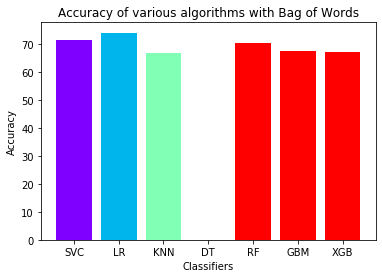

In [182]:
# Accuracy comparison of various algorithms for bag of words
colors = cm.rainbow(np.linspace(0, 2, 9))
labels = ['SVC', 'LR', 'KNN', 'DT', 'RF', 'GBM', 'XGB']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms with Bag of Words')

In [183]:
# Spliting Data form above reduction dataset for tfidf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, df2['sentiment'], test_size = 0.3, random_state = 3)

In [184]:
# Applying various Classification algorithms without doing variable reductions using tfidf
accuracy_scores = np.zeros(7)

# Support Vector Classifier
svm = SVC().fit(X_train, y_train)
prediction1 = svm.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction1)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
logis = LogisticRegression().fit(X_train, y_train)
prediction2 = logis.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction2)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
knn = KNeighborsClassifier().fit(X_train, y_train)
prediction3 = knn.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction3)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Gaussian Naive Bayes
#clf = GaussianNB().fit(X_train, y_train)
#prediction4 = clf.predict(X_test)
#accuracy_scores[3] = accuracy_score(y_test, prediction4)*100
#print('Gaussian Naive Bayes Classifier accuracy: {}%'.format(accuracy_scores[3]))

# Decision Tree
#decision = DecisionTreeClassifier().fit(X_train, y_train)
#prediction4 = decision.predict(X_test)
#accuracy_scores[3] = accuracy_score(y_test, prediction4)*100
#print('Decision Tree Classifier accuracy: {}%'.format(accuracy_scores[3]))


# Random Forest
random = RandomForestClassifier().fit(X_train, y_train)
prediction5 = random.predict(X_test)
accuracy_scores[4] = accuracy_score(y_test, prediction5)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[4]))

# Gradient Boosting
GB = GradientBoostingClassifier().fit(X_train, y_train)
prediction6 = GB.predict(X_test)
accuracy_scores[5] = accuracy_score(y_test, prediction6)*100
print('Gradient Boosting Classifier accuracy: {}%'.format(accuracy_scores[5]))

#XGBoosting
xgb_model = xgb.XGBClassifier() 
xgb_model.fit(X_train, y_train)
prediction7 = xgb_model.predict(X_test)
accuracy_scores[6] = accuracy_score(y_test, prediction7)*100
print('XGBoost Classifier accuracy: {}%'.format(accuracy_scores[6]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Classifier accuracy: 71.87666666666667%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression accuracy: 74.10666666666667%
K Nearest Neighbors Classifier accuracy: 65.68833333333333%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier accuracy: 71.51333333333334%
Gradient Boosting Classifier accuracy: 68.06166666666667%
XGBoost Classifier accuracy: 67.42666666666666%


Text(0.5, 1.0, 'Accuracy of various algorithms with tfidf')

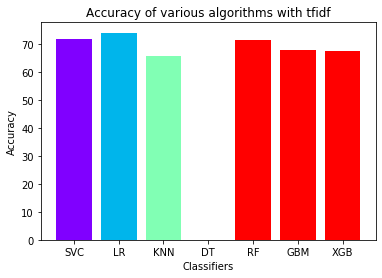

In [185]:
# Accuracy comparison of various algorithms for bag of words
colors = cm.rainbow(np.linspace(0, 2, 9))
labels = ['SVC', 'LR', 'KNN', 'DT', 'RF', 'GBM', 'XGB']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms with tfidf')

              precision    recall  f1-score   support

           0       0.76      0.70      0.73     30135
           4       0.72      0.78      0.75     29865

    accuracy                           0.74     60000
   macro avg       0.74      0.74      0.74     60000
weighted avg       0.74      0.74      0.74     60000



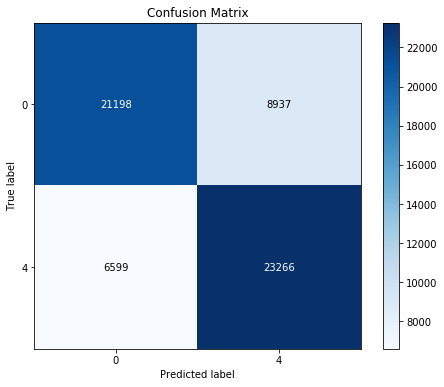

In [186]:
# check validation statistics (Classification Summary)
print(classification_report(y_test, prediction2)) # from confusion matrix Logistics Regression perform well
# Plot confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, prediction2, figsize=(8, 6))
plt.show()

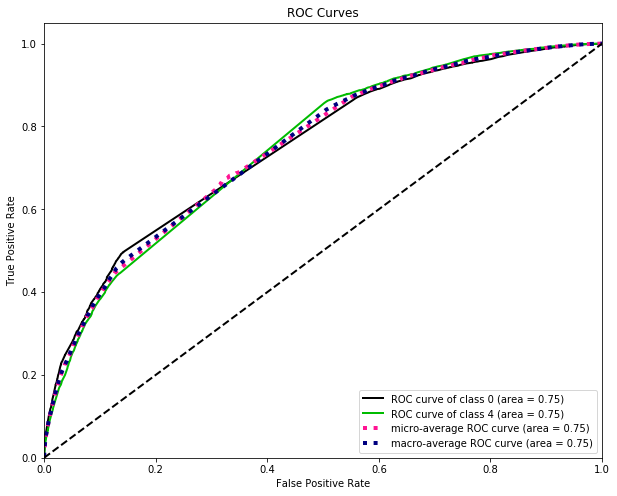

In [187]:
# ROC Curves
y_probas = xgb_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8)) # Plot ROC Curve
plt.show()

Based on the above, for both bag of words and tfidf, it is evident that the top 3 performing models are Logistic Regression, SVC and Random Forest. Between bag of words and tfidf, tfidf performs marginally better. Logistic Regression performs the best, with one of its strengths being good for binary classification models such as this problem. These three models will be used for the Canadian Elections csv and the top performing model for that will be picked for further hyperparameter tuning. 

### Data Import & Cleaning - Canadian Elections

In [188]:
candf2 = pd.read_csv('Canadian_elections_2019.csv')
candf2.head(n=5)

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."


In [189]:
# Data cleaning and pre-process dataset
nltk.download('stopwords')

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" 
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [190]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

candf2.text = candf2.text.apply(lambda x: preprocess(x))

### Exporatory Analysis - Canadian Elections

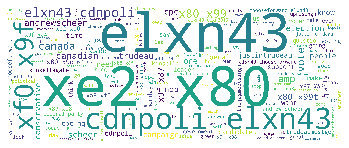

In [191]:
# all tweets 
all_words = " ".join(candf2.text)

# Wordcloud of tweets
wordcloud = WordCloud(height=4000, width=10000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Below, we will attempt to count the number of times there has been a positive tweet about any of the three major parties (NDP, Liberals or Conservatives) as well as negative tweets to determine if we can obtain any insights into the final results

In [192]:
print('Number of positive mention for NDP or Jagmeet Singh')
print(candf2[(candf2['text'].str.contains('ndp|singh|jagmeet'))&(candf2['sentiment'] == 'positive')].shape[0])

Number of positive mention for NDP or Jagmeet Singh
161


In [193]:
print('Number of positive mention for Liberals or Trudeau')
print(candf2[(candf2['text'].str.contains('liberal|trudeau|justin'))&(candf2['sentiment'] == 'positive')].shape[0])

Number of positive mention for Liberals or Trudeau
244


In [194]:
print('Number of positive mention for Conservatives or Andrew Scheer')
print(candf2[(candf2['text'].str.contains('conservative|andrew|scheer'))&(candf2['sentiment'] == 'positive')].shape[0])

Number of positive mention for Conservatives or Andrew Scheer
192


Interestingly, the ratio of positive tweets for Liberals:Conservatives (244:192 = 1.27:1) is very close to the actual ratio of number of seats won between the two during the 2019 Federal Elections (157:121 = 1.3:1). The public opinion on social media correlates incredibly well with the actual results of the election. 

In [195]:
print('Number of negative mention for NDP or Jagmeet Singh')
print(candf2[(candf2['text'].str.contains('ndp|singh|jagmeet'))&(candf2['sentiment'] == 'negative')].shape[0])

Number of negative mention for NDP or Jagmeet Singh
100


In [196]:
print('Number of negative mention for Liberals or Trudeau')
print(candf2[(candf2['text'].str.contains('liberal|trudeau|justin'))&(candf2['sentiment'] == 'negative')].shape[0])

Number of negative mention for Liberals or Trudeau
292


In [197]:
print('Number of negative mention for Conservatives or Andrew Scheer')
print(candf2[(candf2['text'].str.contains('conservative|andrew|scheer'))&(candf2['sentiment'] == 'negative')].shape[0])

Number of negative mention for Conservatives or Andrew Scheer
381


Interestingly, the ratio of negative tweets between Conservatives/Andrew Scheer and Liberal/Justin Trudeau is also 1.3:1, which is the ratio of seats won by Liberals:Conservatives. The negative public opinions on social media correlates incredibly well with the actual results of the election as well. 

### Model Preparation - Canadian Elections

In [198]:
# Replacing the class value to integer
candf2.sentiment.replace(('positive', 'negative'), (4, 0), inplace=True)
print(candf2)

      sentiment                      negative_reason  \
0             0  Women Reproductive right and Racism   
1             4                                  NaN   
2             0                              Economy   
3             4                                  NaN   
4             0                              Economy   
5             0                               Others   
6             4                                  NaN   
7             4                                  NaN   
8             0                               Others   
9             0                              Scandal   
10            4                                  NaN   
11            4                                  NaN   
12            4                                  NaN   
13            4                                  NaN   
14            0                               Others   
15            0                            Tell lies   
16            4                                 

In [199]:
# tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, 
# and tokenization is the process of splitting a string of text into tokens
tokenized_tweet = candf2['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [b, rosiebarton, instead, suggestion, agree, c...
1    [b, allwomanspacewalk, real, n, n, etobicokeno...
2    [b, brantford, going, cost, 94, billion, next,...
3    [b, canada, canadaelection2019, canadavotes, n...
4    [b, canada, taxpayers, sick, amp, tired, hard,...
Name: text, dtype: object

In [200]:
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [b, rosiebarton, instead, suggest, agre, canad...
1    [b, allwomanspacewalk, real, n, n, etobicokeno...
2    [b, brantford, go, cost, 94, billion, next, 4,...
3    [b, canada, canadaelection2019, canadavot, n, ...
4    [b, canada, taxpay, sick, amp, tire, hard, ear...
Name: text, dtype: object

In [201]:
# let’s stitch these tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

candf2['text'] = tokenized_tweet
print(candf2)

      sentiment                      negative_reason  \
0             0  Women Reproductive right and Racism   
1             4                                  NaN   
2             0                              Economy   
3             4                                  NaN   
4             0                              Economy   
5             0                               Others   
6             4                                  NaN   
7             4                                  NaN   
8             0                               Others   
9             0                              Scandal   
10            4                                  NaN   
11            4                                  NaN   
12            4                                  NaN   
13            4                                  NaN   
14            0                               Others   
15            0                            Tell lies   
16            4                                 

In [202]:
# Bag-of-Words features can be easily created using sklearn’s CountVectorizer function. 
# We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(candf2['text'])
print(bow)

  (0, 18)	1
  (0, 107)	1
  (0, 131)	1
  (0, 453)	1
  (0, 723)	1
  (0, 918)	1
  (0, 664)	1
  (0, 348)	1
  (0, 176)	1
  (0, 56)	1
  (0, 867)	1
  (0, 919)	1
  (0, 111)	1
  (0, 40)	1
  (0, 812)	1
  (0, 408)	1
  (0, 725)	1
  (1, 591)	1
  (1, 691)	1
  (1, 131)	1
  (2, 428)	1
  (2, 66)	1
  (2, 992)	1
  (2, 87)	1
  (2, 188)	1
  :	:
  (2129, 390)	1
  (2129, 59)	1
  (2129, 194)	1
  (2129, 83)	1
  (2129, 109)	1
  (2129, 66)	1
  (2129, 131)	1
  (2130, 350)	1
  (2130, 801)	1
  (2130, 269)	1
  (2130, 706)	1
  (2130, 266)	1
  (2130, 479)	1
  (2130, 892)	1
  (2130, 538)	1
  (2130, 131)	1
  (2131, 214)	1
  (2131, 951)	1
  (2131, 736)	1
  (2131, 735)	1
  (2131, 944)	1
  (2131, 963)	1
  (2131, 988)	1
  (2131, 18)	1
  (2132, 538)	1


In [203]:
# TF-IDF works by penalizing the common words by assigning them lower weights while giving 
# importance to words which are rare in the entire corpus but appear in good numbers
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(candf2['text'])

As we saw from the Genric Tweets analysis, TFIDF performed marginally better than Bag of Words. Therefore, in the interest of processing time, TFIDF will be used for Canadian Elections.

In [204]:
# Spliting Data form above reduction dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(tfidf, candf2['sentiment'], test_size = 0.3, random_state = 3)

### Model Implementation & Results - Canadian Elections

In [205]:
#predicting various Classification algorithms 
accuracy_scores = np.zeros(3)

# Support Vector Classifier
prediction_svm = svm.predict(X_valid)
accuracy_scores[0] = accuracy_score(y_valid, prediction_svm)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
prediction_logit = logis.predict(X_valid)
accuracy_scores[1] = accuracy_score(y_valid, prediction_logit)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# Random Forest
prediction_random = random.predict(X_valid)
accuracy_scores[2] = accuracy_score(y_valid, prediction_random)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[2]))


Support Vector Classifier accuracy: 52.03124999999999%
Logistic Regression accuracy: 48.90625%
Random Forest Classifier accuracy: 50.46874999999999%


Similar to the Generic Tweets file, Logistic Regrssion appears to perform slightly better for Canadian Elections as well. This model will be selected going forward for further hyperparameter tuning in order to improve the accuracy. 

Text(0.5, 1.0, 'Accuracy of various algorithms')

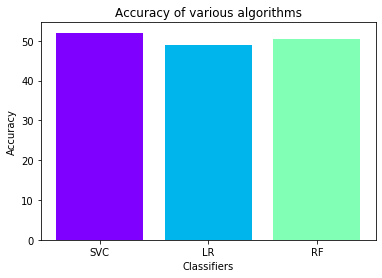

In [206]:
# Accuracy comparison of various algorithms
colors = cm.rainbow(np.linspace(0, 2, 9))
labels = ['SVC', 'LR', 'RF']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')

In [207]:
#SVC hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.524, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.524, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.523, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.524, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.524, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.523, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.524, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.524, total=   0.2s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   13.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [208]:
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


The tuned hyperparameters for SVC is pretty much its default values. Hence, lets explore Logistic Regression instead for hyperparameter tuning and evaluate if there is an imporvement in accuracy. 

In [209]:
# taking logistic regression as the final model (stable and higher accuracy)
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [210]:
#Logsitic Regression hyperparameter tuning
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)
#Model after tuning
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.687207 using {'C': 1.0, 'dual': True, 'max_iter': 100}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [211]:
# Logistic Regression accuracy after hypertuning
prediction_logit_new = grid_result.predict(X_valid)
accuracy_scores_logit_new = accuracy_score(y_valid, prediction_logit_new)*100
print('Logistic Regression accuracy after hyperparameter tuning: {}%'.format(accuracy_scores_logit_new))

Logistic Regression accuracy after hyperparameter tuning: 73.90625%


In the datasets used in this exercise, the sentiments were binary i.e. either positive or negative. Often times, the sentiment obtained from the tweet is more of a fact than a clear binary choice between positive and negative. In such cases, the sentiment of the tweet assigned is entirely subjective upon the human assigning the sentiment class. For sentiment analysis cases with continuous variables assigned to each sentiment (happiness, sadness, anger, etc.), the mixture of sentiment (i.e. emotion) is much better relayed than a clear binary assignment of a human's emotion, such as in this case. Therefore, a discrete classification of sentiment comes with its own pitfalls. Therefore, doing a continuous variable sentiment analysis is preferred over discrete binary assignment. 

For predicting the class of negative_reasons, oftentimes the reason itself can be a combination of two different reasons. For example, some of the negative sentiments are a combination of "Economy" and "Tell Lies" where the tweet states lies or incorrect statements made by the political party with respect to the economy. Similar cases exist for other pair of negative_reasons as well. Therefore, the assignment of classes in this case as well might not be totally representative of the actual negative_reason if there are multiple reasons. One of the suggestions would be re-classifying these negative_reasons with the options of adding a secondary reason to it as well. This will, however, increase the number of target variable classes.  

### Classification of Negative Reasons

In [243]:
candf3 = candf2.dropna(axis=0, subset=['negative_reason'])
candf3.head()

,sentiment,negative_reason,text
0,0,Women Reproductive right and Racism,b rosiebarton instead suggest agre canadian wo...
2,0,Economy,b brantford go cost 94 billion next 4 year ask...
4,0,Economy,b canada taxpay sick amp tire hard earn donat ...
5,0,Others,b canadavotes2019 elxn43 cdnpoli fact blastfro...
8,0,Others,b chooseforward cdnpoli elxn43 ncanada make am...


In [244]:
# Data cleaning and pre-process dataset
nltk.download('stopwords')

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" 
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [245]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

candf3.text = candf3.text.apply(lambda x: preprocess(x))
candf3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,sentiment,negative_reason,text
0,0,Women Reproductive right and Racism,b rosiebarton instead suggest agre canadian wo...
2,0,Economy,b brantford go cost 94 billion next 4 year ask...
4,0,Economy,b canada taxpay sick amp tire hard earn donat ...
5,0,Others,b canadavotes2019 elxn43 cdnpoli fact blastfro...
8,0,Others,b chooseforward cdnpoli elxn43 ncanada make am...
9,0,Scandal,b cpckinsellag nlet see receipt pay warren kin...
14,0,Others,b kinsella run deep w cpc lyingandi craze anti...
15,0,Tell lies,b lyingandi histori answer embarrass question ...
19,0,Scandal,b urgent pleas watch video david haskel peopl ...
20,0,Others,b polici comment illeg immor nefari activ cpc ...


In [246]:
# Combining healthcare and marijuana and healthcare into one
candf3['negative_reason'] = candf3['negative_reason'].str.replace('Healthcare and Marijuana','Healthcare')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [247]:
candf3.drop(candf3.index[candf3['negative_reason'] == 'Others'], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [248]:
candf3

,sentiment,negative_reason,text
0,0,Women Reproductive right and Racism,b rosiebarton instead suggest agre canadian wo...
2,0,Economy,b brantford go cost 94 billion next 4 year ask...
4,0,Economy,b canada taxpay sick amp tire hard earn donat ...
9,0,Scandal,b cpckinsellag nlet see receipt pay warren kin...
15,0,Tell lies,b lyingandi histori answer embarrass question ...
19,0,Scandal,b urgent pleas watch video david haskel peopl ...
26,0,Scandal,b alternatespunki electionscan e electionson c...
29,0,Tell lies,b althiaraj ask question hypothet n cdnpoli el...
30,0,Scandal,b althiaraj surpris n justintrudeau answer q y...
33,0,Scandal,b andrewsch warren jwr yell us new stori invol...


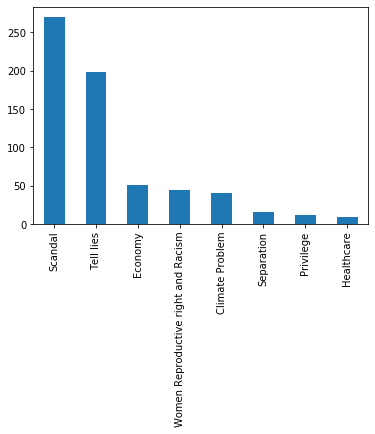

In [249]:
candf3['negative_reason'].value_counts().plot(kind='bar')

As we can see, the target variable class is heavily imbalanced. Additionally, the two dominant classes "Scandal" and "Tell Lies" are similar type of reasons. However, those will not be combined into one as it will further increase the imbalance of the dataset. 

In [232]:
# tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, 
# and tokenization is the process of splitting a string of text into tokens
tokenized_tweet = candf3['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0     [b, rosiebarton, instead, suggest, agre, canad...
2     [b, brantford, go, cost, 94, billion, next, 4,...
4     [b, canada, taxpay, sick, amp, tire, hard, ear...
9     [b, cpckinsellag, nlet, see, receipt, pay, war...
15    [b, lyingandi, histori, answer, embarrass, que...
Name: text, dtype: object

In [233]:
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0     [b, rosiebarton, instead, suggest, agr, canadi...
2     [b, brantford, go, cost, 94, billion, next, 4,...
4     [b, canada, taxpay, sick, amp, tire, hard, ear...
9     [b, cpckinsellag, nlet, see, receipt, pay, war...
15    [b, lyingandi, histori, answer, embarrass, que...
Name: text, dtype: object

In [234]:
# Bag-of-Words features can be easily created using sklearn’s CountVectorizer function. 
# We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(candf3['text'])
print(bow)

  (0, 17)	1
  (0, 130)	1
  (0, 153)	1
  (0, 471)	1
  (0, 707)	1
  (0, 934)	1
  (0, 658)	1
  (0, 371)	1
  (0, 193)	1
  (0, 50)	1
  (0, 881)	1
  (0, 935)	1
  (0, 134)	1
  (0, 36)	1
  (0, 827)	1
  (0, 425)	1
  (0, 710)	1
  (1, 445)	1
  (1, 69)	1
  (1, 995)	1
  (1, 99)	1
  (1, 201)	1
  (1, 130)	1
  (1, 153)	1
  (2, 279)	1
  :	:
  (640, 284)	1
  (640, 940)	1
  (640, 132)	1
  (640, 95)	1
  (640, 695)	1
  (640, 453)	1
  (640, 184)	1
  (640, 478)	1
  (640, 234)	2
  (640, 378)	1
  (640, 398)	1
  (640, 408)	1
  (640, 204)	1
  (640, 53)	1
  (640, 69)	1
  (640, 153)	1
  (641, 954)	1
  (641, 689)	1
  (641, 960)	1
  (641, 227)	1
  (641, 724)	1
  (641, 723)	1
  (641, 972)	1
  (641, 991)	1
  (641, 17)	1


In [235]:
# TF-IDF works by penalizing the common words by assigning them lower weights while giving 
# importance to words which are rare in the entire corpus but appear in good numbers
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(candf3['text'])

In [236]:
# Spliting Data form above reduction dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(tfidf, candf3['negative_reason'], test_size = 0.3, random_state = 3)

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# taking logistic regression as a final model (stable accuracy on new data)
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

#Model hypertune
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)
#Model after tuning
grid_result = grid.fit(X_train, y_train)
# Summarize results
#print("Best: %f using %s" % (grid_result.best_score, grid_result.best_params))

# Logistic Regression accuracy after hypertuning
prediction_logit_new = grid_result.predict(X_valid)
accuracy_scores_logit_new = accuracy_score(y_valid, prediction_logit_new)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores_logit_new))

Logistic Regression accuracy: 59.58549222797927%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.06      0.12        16
                            Economy       0.60      0.23      0.33        13
                         Healthcare       0.00      0.00      0.00         2
                          Privilege       0.00      0.00      0.00         4
                            Scandal       0.64      0.87      0.74        84
                         Separation       0.00      0.00      0.00         3
                          Tell lies       0.51      0.71      0.60        52
Women Reproductive right and Racism       1.00      0.05      0.10        19

                           accuracy                           0.60       193
                          macro avg       0.47      0.24      0.24       193
                       weighted avg       0.64      0.60      0.52       193



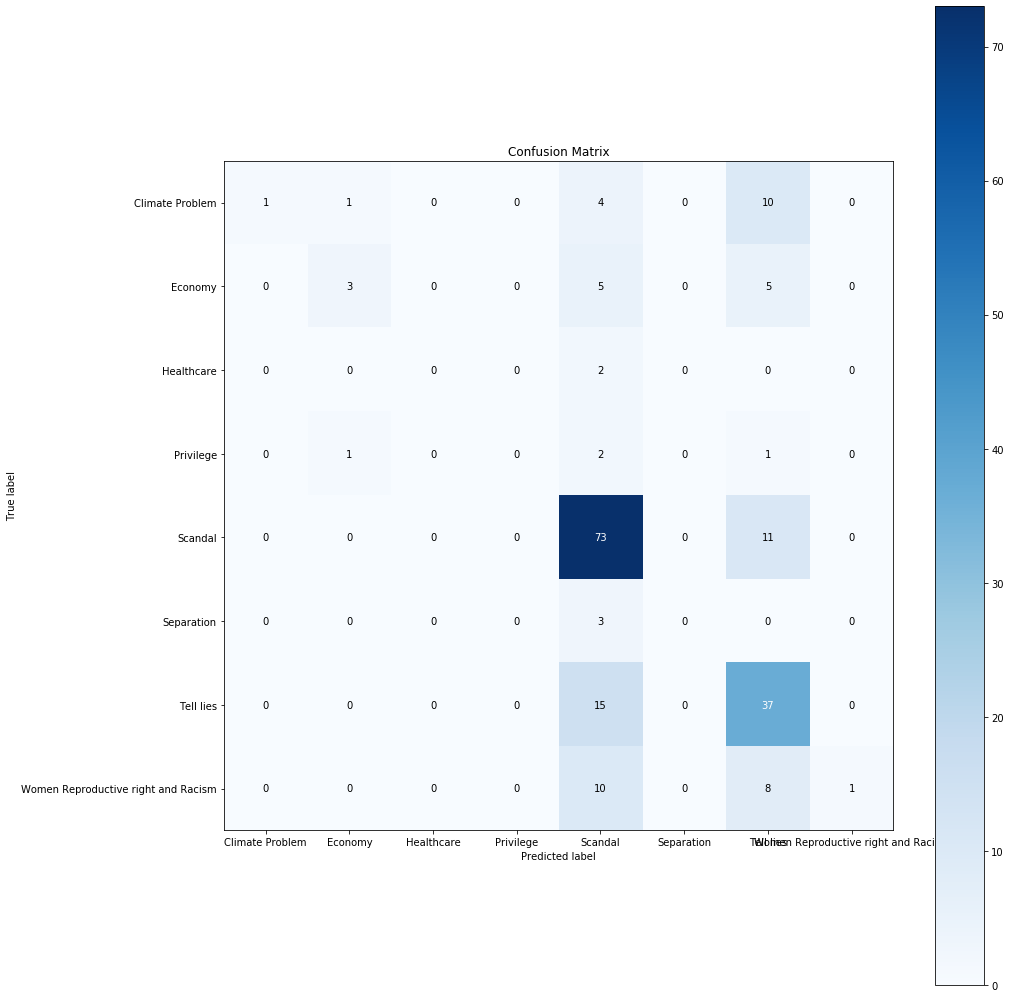

In [238]:
# check validation statistics (Classification Summary) for TDIDF
import scikitplot as skplt
print(classification_report(y_valid, prediction_logit_new)) # from confusion matrix Logistics Regression perform well
# Plot confusion Matrix
skplt.metrics.plot_confusion_matrix(y_valid, prediction_logit_new, figsize=(15, 18))
plt.show()

In [239]:
# Spliting Data form above reduction dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(bow, candf3['negative_reason'], test_size = 0.3, random_state = 3)

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# taking logistic regression as a final model (stable accuracy on new data)
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

#Model hypertune
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)
#Model after tuning
grid_result = grid.fit(X_train, y_train)
# Summarize results
#print("Best: %f using %s" % (grid_result.best_score, grid_result.best_params))

# Logistic Regression accuracy after hypertuning
prediction_logit_new = grid_result.predict(X_valid)
accuracy_scores_logit_new = accuracy_score(y_valid, prediction_logit_new)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores_logit_new))

Logistic Regression accuracy: 62.17616580310881%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                     precision    recall  f1-score   support

                    Climate Problem       0.60      0.19      0.29        16
                            Economy       0.42      0.38      0.40        13
                         Healthcare       0.00      0.00      0.00         2
                          Privilege       0.00      0.00      0.00         4
                            Scandal       0.70      0.79      0.74        84
                         Separation       0.00      0.00      0.00         3
                          Tell lies       0.54      0.71      0.61        52
Women Reproductive right and Racism       0.75      0.47      0.58        19

                           accuracy                           0.62       193
                          macro avg       0.38      0.32      0.33       193
                       weighted avg       0.60      0.62      0.60       193



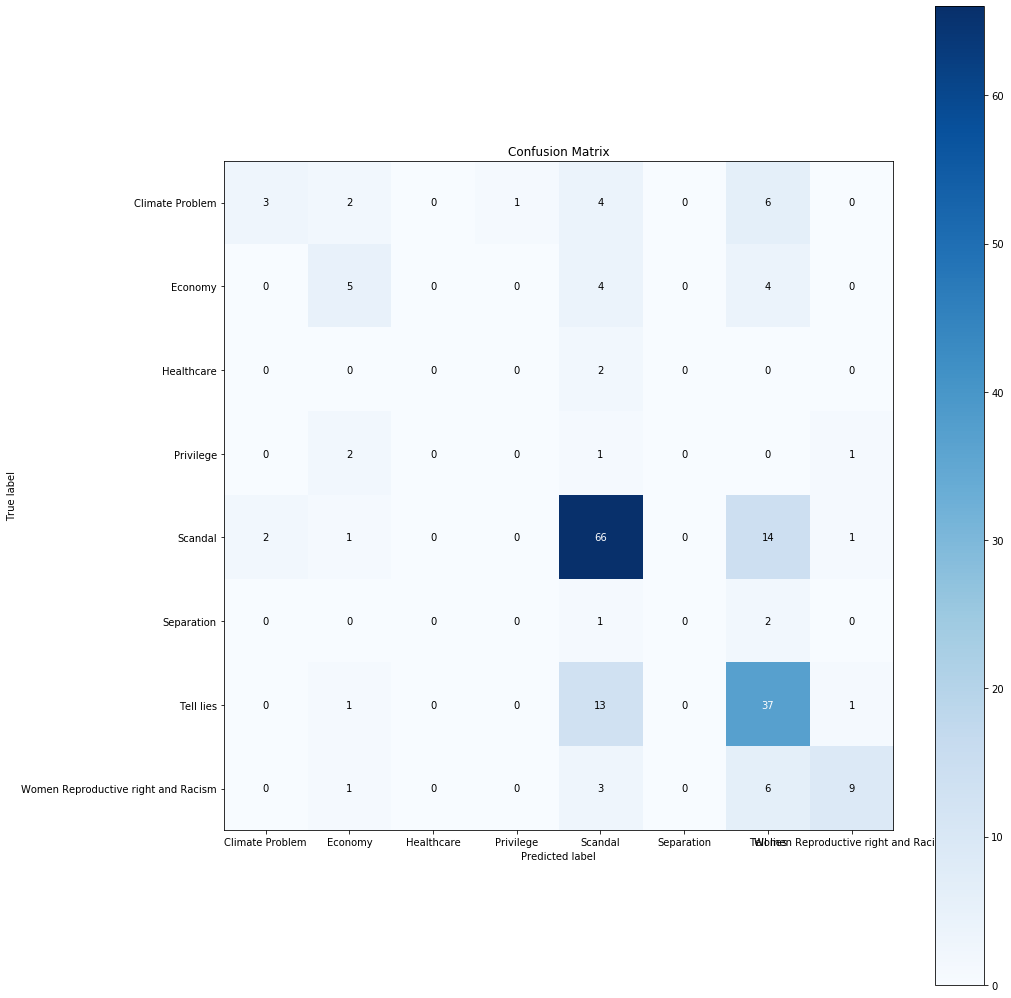

In [241]:
# check validation statistics (Classification Summary) for Bag of Words
import scikitplot as skplt
print(classification_report(y_valid, prediction_logit_new)) # from confusion matrix Logistics Regression perform well
# Plot confusion Matrix
skplt.metrics.plot_confusion_matrix(y_valid, prediction_logit_new, figsize=(15, 18))
plt.show()

As aforementioned, sentiment analysis is best used when there is one or multiple moods that can be assignmed as part of the sentiment rather than just binary assignment of positive or negative. Most real life election sentiment analysis of social media involves these mood labels which helps better understand the depth of sentiment of the voter and reduces the subjectivity of the human assigning the binary sentiment reading the tweet.

Therefore, it is critical that the training model is well balanced and the negative_reason cateogires are carefully determined to minimize any potential overlap in their meaning. As we can see from the confusion matrix above, "Scandal" is often confused with "Tell Lies" as we predicted earlier and causes the highest degree of error. If we were to combine these two into one target variable, it will definitely improve the accuracy of the model but will lead to a heavily imbalanced data set. 